<a href="https://colab.research.google.com/github/freny-caicedo-endava/Pio.ML/blob/master/MLIntro_P1_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> ![answer](https://drive.google.com/uc?export=view&id=1yj7jPO0w4Ayq1OxkpflWOE-BBdMd_O4k)

## Introduction to Machine Learning.      
###PART ONE: Fundamentals


# 1. WARMING UP


## 1.1 So, what is Machine learning?


*   "*Field of study that gives computers the ability to learn without being explicitly programmed*" - Arthur Samuel, IBM, 1959 
*   "*Machine learning algorithms can figure out how to perform important tasks by generalizing from examples*" - Pedro Domingos, university of Washington
*   Field of Computer Science and Artificial intelligence that “learns” from data without human intervention

> ![answer](https://drive.google.com/uc?export=view&id=1nnfXzHPEfdqdgA_RNPZfeUYYsa_c_Osr)

> Just one sample, can we figure out what's next?

![answer](https://drive.google.com/uc?export=view&id=1pGR-uys5YAXYrRNkbI60o2u8ABxDH610)


> What about having two samples?

![answer](https://drive.google.com/uc?export=view&id=1XgkXCZtdg_1Cl8osr3yjRGiGJXHcomF-)

> Answer:

![answer](https://drive.google.com/uc?export=view&id=1mRTbLt2KI7X8pKSV0LP6zxd8yqCTHcHv)



![answer](https://drive.google.com/uc?export=view&id=1lQ6xJFo8H6NUar4V4szXY1i2n7wVHJEP)


## 1.2 Kinds of Machine learning


### Supervised Learning

In this case, the system tries to learn from the previous examples that are given.

We have both input variables (x) and output variables(Y) and can use an algorithm to derive the mapping function from the input to the output Y = f(X).

The goal is to approximate the mapping function so well that when you have new input data (x) you can predict the output variables (Y).


Supervised learning can be further divided into two parts: *Classification* and *Regression*.

![answer](https://drive.google.com/uc?export=view&id=1MZovtEKTrnKyYufVQgzPbIOxKey6ppfp)

A *Classification* problem is when the output variable is a category or a group, such as “disease” and “no disease” or “spam” and “no spam”, so the function being learned is discrete.

A *Regression* problem is when the output variable is a real value, such as “dollars” or “height.”


### Unsupervised Learning

Here, the algorithms are left to themselves to discover interesting structures in the data because  you only have input data (X) and no corresponding output variables, the system attempts to find the patterns directly from the example given.

![answer](https://drive.google.com/uc?export=view&id=1q9UocXAlD3qI5c5ul4jPg-ehmLCYa09H)

They are quite useful in providing humans with insights into the meaning of data and new useful inputs to supervised machine learning algorithms.


### Reinforcement Learning

A reinforcement learning algorithm learns by interacting with its environment, it receives rewards by performing correctly and penalties for performing incorrectly. It learns without human intervention by maximizing its reward and minimizing its penalty, in this way the agent improves its environment knowledge to select the next action.


### Deep Learning

Deep Learning is a subfield of machine learning that mimics the workings of the human brain in processing data for use in decision making.

Most deep learning methods use neural network architectures, which is why deep learning models are often referred to as deep neural networks.

![answer](https://drive.google.com/uc?export=view&id=1r25sJVCmCKcxtRzJJJ32gnOSa397eorn)
 Networks can have tens or hundreds of hidden layers.

# 2. REGRESSION

### 2.1 Basic problem

```
-------------
  x  │  y
-------------
  1  │  1
  2  │  4
  3  │ ???
------------

```

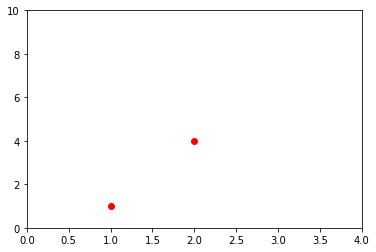

In [0]:
import matplotlib.pyplot as plt

plt.plot([1, 2], [1, 4], 'ro')
plt.axis([0, 4, 0, 10])
plt.show()


```
m = (y2 − y1)/(x2 − x1)
m = (4 - 1)/(2 - 1)
m = 3

y − y1 = m(x − x1)
y - 1 = 3(x - 1)
y = 3x - 3 + 1

y = 3x - 2

```

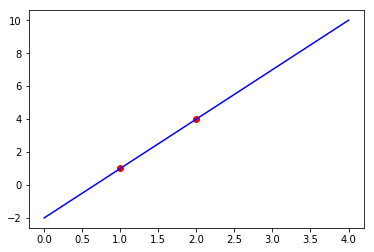

In [0]:
import numpy as np

def f(x):
  return 3*x - 2

input, ouput = [], []

for x in range(5):
  input.append(x)
  ouput.append(f(x))
  
plt.plot([1, 2], [1, 4], 'ro')
plt.plot(input, ouput, 'b')
plt.show()

### 2.2 A bit more complex problem

```
-------------
  x  │  y
-------------
  1  │  3
  2  │  3.2
  3  │  4
  4  │  2
  5  │  3.8
  6  │  3.5
------------
```

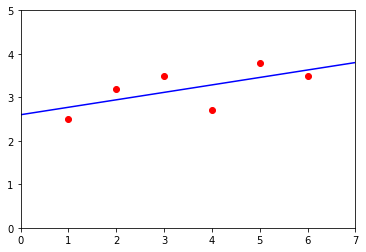

In [0]:
from sklearn.linear_model import LinearRegression


# COLLECT AND EXPLORE

table = {
    1: 2.5,
    2: 3.2,
    3: 3.5,
    4: 2.7,
    5: 3.8,
    6: 3.5
}


train, target = [], []

for x, y in table.items():
  train.append([x])
  target.append([y])

plt.plot(train, target, 'ro')
plt.axis([0, 7, 0, 5])


# TRAIN

train, target = np.array(train), np.array(target)
model = LinearRegression().fit(train, target)


# TEST

testX, testY = [], []

for x in range(8):
  answer = model.predict(np.array([[x]]))
  testX.append([x])
  testY.append(answer[0])

plt.plot(testX, testY, 'b')
plt.show()


# 3. CLASSIFICATION

In the next example we need to build a model to predict is a person earns more that USD$ 50K a year or not.

## 3.1 Load and pre-process data

Let's start by uploading our census.csv file using Colab's interface.

In [9]:
import pandas as pd

# load to Pandas Dataframe and preview
df = pd.read_csv('census.csv', header=0)
df.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [10]:
from sklearn.preprocessing import LabelEncoder

## Encode labels ##

string_cols = ['workclass', 'education_level', 'marital_status', 'occupation',
               'relationship', 'race', 'sex', 'native_country', 'income']

encoders = {}

for row_name in string_cols:
  encoders[str(row_name)] = LabelEncoder().fit(df[row_name])
  df[row_name] = encoders[str(row_name)].transform(df[row_name])

df.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0


In [11]:
# remove target column
y = df.pop('income')
df.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4


## 3.2 Train and measure Accuracy

### - Native Bayes

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import time

t0 = time.time()

# build model
clf = GaussianNB()
clf.fit(df, y)
print(f'GaussianNB, {time.time()-t0:.3f} seconds training.') 

# get scores
scores = cross_val_score(clf, df, y, cv=5)
print(scores)
print(f"Accuracy: {scores.mean():0.2f} (+/- {scores.std() * 2:0.5f})")

GaussianNB, 0.036 seconds training.
[0.79270315 0.79635158 0.79215036 0.79854047 0.79365255]
Accuracy: 0.79 (+/- 0.00482)


### - Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier

t0 = time.time()

clf = DecisionTreeClassifier(random_state=0)
clf.fit(df, y)
print(f'DecisionTree, {time.time()-t0:.3f} seconds training.') 

scores = cross_val_score(clf, df, y, cv=5)
print(scores)
print(f"Accuracy: {scores.mean():0.2f} (+/- {scores.std() * 2:0.5f})")

DecisionTree, 0.236 seconds training.
[0.81503593 0.8145937  0.82310669 0.81689518 0.8106823 ]
Accuracy: 0.82 (+/- 0.00812)


### - Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

t0 = time.time()

clf = RandomForestClassifier(n_estimators=100)
clf.fit(df, y)
print(f'RandomForest, {time.time()-t0:.3f} seconds training.') 

scores = cross_val_score(clf, df, y, cv=5)
print(scores)
print(f"Accuracy: {scores.mean():0.2f} (+/- {scores.std() * 2:0.5f})")

RandomForest, 6.258 seconds training.
[0.84776119 0.84400221 0.85461581 0.84663866 0.84120314]
Accuracy: 0.85 (+/- 0.00900)


## 3.3  Testing new samples

In [15]:
df = pd.read_csv('census.csv', header=0)

for col in string_cols:
    print(f'{col}= "" #@param {list(df[col].unique())}')

workclass= "" #@param [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay']
education_level= "" #@param [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate', ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool', ' 12th', ' 1st-4th']
marital_status= "" #@param [' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
occupation= "" #@param [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' Craft-repair', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv']
relationship= "" #@param [' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative']
race= "" #@param [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' O

In [17]:
from IPython.display import display, HTML

age = 39 #@param {type:"slider", min:18, max:70, step:1}
workclass= " State-gov" #@param [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay']
education_level= " Masters" #@param [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate', ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool', ' 12th', ' 1st-4th']
education_num = 13 #@param {type:"number"}
marital_status= " Never-married" #@param [' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
occupation= " Adm-clerical" #@param [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' Craft-repair', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv']
relationship= " Not-in-family" #@param [' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative']
race= " White" #@param [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']
sex= " Male" #@param [' Male', ' Female']
capital_gain = 9741 #@param {type:"slider", min:0, max:20000, step:1}
capital_loss = 1861 #@param {type:"slider", min:0, max:10000, step:1}
hours_per_week = 40 #@param {type:"slider", min:1, max:100, step:1}
native_country= " United-States" #@param [' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico', ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany', ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala', ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland', ' Hungary', ' Holand-Netherlands']
income = None

# encode user inputs
for key in encoders.keys():
  if key is not 'income':
    globals()[key] = encoders[key].transform([globals()[key]])[0]

# get a prediction
res = clf.predict([[age, workclass, education_level, education_num,
                    marital_status, occupation, relationship, race,
                    sex, capital_gain, capital_loss,
                    hours_per_week, native_country]])
res = encoders['income'].inverse_transform(res)[0]

# print results
html = f"""
  <div style="padding: 3em; text-align: center;">
    <h3>More than USD$50K a year?</h3>
    <h1>{'... No' if res == '<=50K' else 'YES!!'}</h1>
  </div>"""
display(HTML(html))

